# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []


url = "http://api.openweathermap.org/data/2.5/weather?"
units='imperial'
query_url = f"{url}appid={api_key}&units={units}&q="

print(f'Beginning Data Retrieval')
print('--------------------------------')

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        City.append(response["name"])
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        date = datetime.fromtimestamp(response["dt"])
        Date.append(date)
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Wind_Speed.append(response["wind"]["speed"])
        print(f'Processing Record {cities.index(city) + 1} of set 1 | {city}')
    
    except (KeyError, IndexError):
        print('City not found. Skipping...')

Beginning Data Retrieval
--------------------------------
Processing Record 1 of set 1 | hermanus
Processing Record 2 of set 1 | san francisco del mar
Processing Record 3 of set 1 | sechura
Processing Record 4 of set 1 | avarua
Processing Record 5 of set 1 | castro
Processing Record 6 of set 1 | serov
Processing Record 7 of set 1 | chifeng
Processing Record 8 of set 1 | veliki preslav
Processing Record 9 of set 1 | sambava
Processing Record 10 of set 1 | yellowknife
Processing Record 11 of set 1 | lebu
Processing Record 12 of set 1 | college
Processing Record 13 of set 1 | prado
Processing Record 14 of set 1 | vaini
Processing Record 15 of set 1 | carnarvon
Processing Record 16 of set 1 | mataura
Processing Record 17 of set 1 | atuona
Processing Record 18 of set 1 | barrow
Processing Record 19 of set 1 | port blair
City not found. Skipping...
Processing Record 21 of set 1 | luangwa
Processing Record 22 of set 1 | albany
Processing Record 23 of set 1 | tuktoyaktuk
Processing Record 24 o

Processing Record 201 of set 1 | cape town
City not found. Skipping...
Processing Record 203 of set 1 | port elizabeth
Processing Record 204 of set 1 | sherlovaya gora
Processing Record 205 of set 1 | fairbanks
Processing Record 206 of set 1 | san quintin
City not found. Skipping...
Processing Record 208 of set 1 | poso
Processing Record 209 of set 1 | san vicente
Processing Record 210 of set 1 | faanui
City not found. Skipping...
Processing Record 212 of set 1 | hobbs
Processing Record 213 of set 1 | vuktyl
City not found. Skipping...
Processing Record 215 of set 1 | ribeira grande
City not found. Skipping...
Processing Record 217 of set 1 | dingle
Processing Record 218 of set 1 | te anau
Processing Record 219 of set 1 | havoysund
City not found. Skipping...
Processing Record 221 of set 1 | gouyave
Processing Record 222 of set 1 | kizhinga
Processing Record 223 of set 1 | norman wells
Processing Record 224 of set 1 | ust-maya
Processing Record 225 of set 1 | hit
Processing Record 226 

Processing Record 403 of set 1 | areka
Processing Record 404 of set 1 | galveston
City not found. Skipping...
Processing Record 406 of set 1 | muroto
Processing Record 407 of set 1 | baley
Processing Record 408 of set 1 | egvekinot
Processing Record 409 of set 1 | murupara
City not found. Skipping...
Processing Record 411 of set 1 | fukue
Processing Record 412 of set 1 | funadhoo
Processing Record 413 of set 1 | terney
Processing Record 414 of set 1 | atambua
Processing Record 415 of set 1 | diosig
City not found. Skipping...
Processing Record 417 of set 1 | innisfail
Processing Record 418 of set 1 | waipawa
Processing Record 419 of set 1 | emerald
Processing Record 420 of set 1 | pontianak
Processing Record 421 of set 1 | mokrous
Processing Record 422 of set 1 | trebisacce
City not found. Skipping...
Processing Record 424 of set 1 | cobourg
Processing Record 425 of set 1 | lompoc
Processing Record 426 of set 1 | sioux lookout
Processing Record 427 of set 1 | mbala
Processing Record 42

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
WeatherPy_df = pd.DataFrame(
    {'City': City,
     'Cloudiness': Cloudiness,
     'Country': Country,
     'Timestamp': Date,
     'Humidity': Humidity,
     'Longitude': Lng,
     'Latitude': Lat,
     'Max_Temperature': Max_Temp,
     'Wind_Speed': Wind_Speed
    })
WeatherPy_df.count()

City               527
Cloudiness         527
Country            527
Timestamp          527
Humidity           527
Longitude          527
Latitude           527
Max_Temperature    527
Wind_Speed         527
dtype: int64

In [5]:
WeatherPy_df.head()

,City,Cloudiness,Country,Timestamp,Humidity,Longitude,Latitude,Max_Temperature,Wind_Speed
0,Hermanus,100,ZA,2019-07-20 16:24:02,86,19.24,-34.42,46.00,4.00
1,San Francisco del Mar,2,MX,2019-07-20 16:24:02,47,-94.51,16.34,93.22,17.92
2,Sechura,42,PE,2019-07-20 16:19:53,89,-80.82,-5.56,62.98,18.86
3,Avarua,7,CK,2019-07-20 16:24:02,64,-159.78,-21.21,73.40,11.41
4,Castro,90,CL,2019-07-20 16:24:03,100,-73.76,-42.48,41.00,6.93


In [6]:
WeatherPy_df.to_csv('WeatherPy.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
WeatherPy_Lat_axis = WeatherPy_df['Latitude']
Max_Temperature_axis = WeatherPy_df['Max_Temperature']
Humidity_axis = WeatherPy_df['Humidity']
Cloudiness_axis = WeatherPy_df['Cloudiness']
Wind_Speed_axis = WeatherPy_df['Wind_Speed']

#### Latitude vs. Temperature Plot

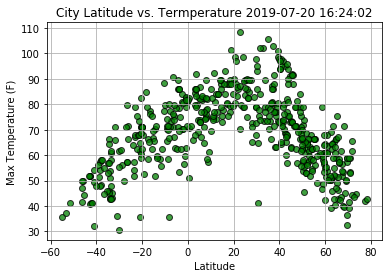

In [8]:
plt.scatter(WeatherPy_Lat_axis, Max_Temperature_axis, marker="o", facecolors="green", edgecolors="black",alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Termperature"+" "+str(WeatherPy_df['Timestamp'][1]))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("City Latitude vs. Termperature.png")

#### Latitude vs. Humidity Plot

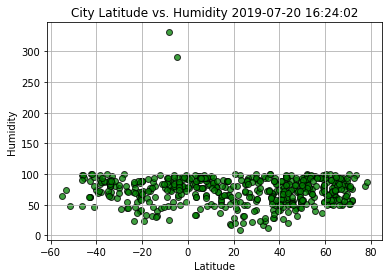

In [9]:
plt.scatter(WeatherPy_Lat_axis, Humidity_axis, marker="o", facecolors="green", edgecolors="black",alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Humidity"+" "+str(WeatherPy_df['Timestamp'][1]))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("City Latitude vs. Humidity.png")

#### Latitude vs. Cloudiness Plot

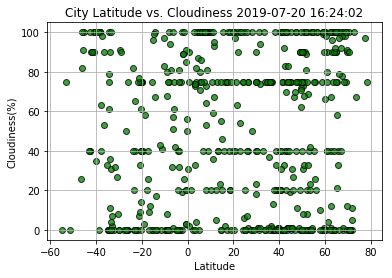

In [10]:
plt.scatter(WeatherPy_Lat_axis, Cloudiness_axis, marker="o", facecolors="green", edgecolors="black",alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Cloudiness"+" "+str(WeatherPy_df['Timestamp'][1]))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.savefig("City Latitude vs. Cloudiness.png")

#### Latitude vs. Wind Speed Plot

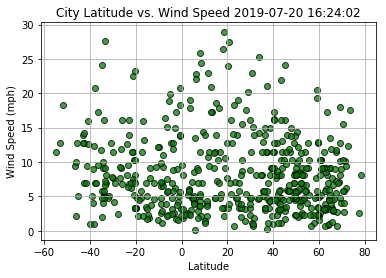

In [11]:
plt.scatter(WeatherPy_Lat_axis, Wind_Speed_axis, marker="o", facecolors="green", edgecolors="black",alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Wind Speed"+" "+str(WeatherPy_df['Timestamp'][1]))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("City Latitude vs. Wind Speed.png")